In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline

In [2]:
%cd '/content/drive/MyDrive/CodeClause Internship/Wine Quality Prediction'
%ls

/content/drive/MyDrive/CodeClause Internship/Wine Quality Prediction
'Wine Quality Prediction.ipynb'   winequality-red.csv


In [3]:
wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


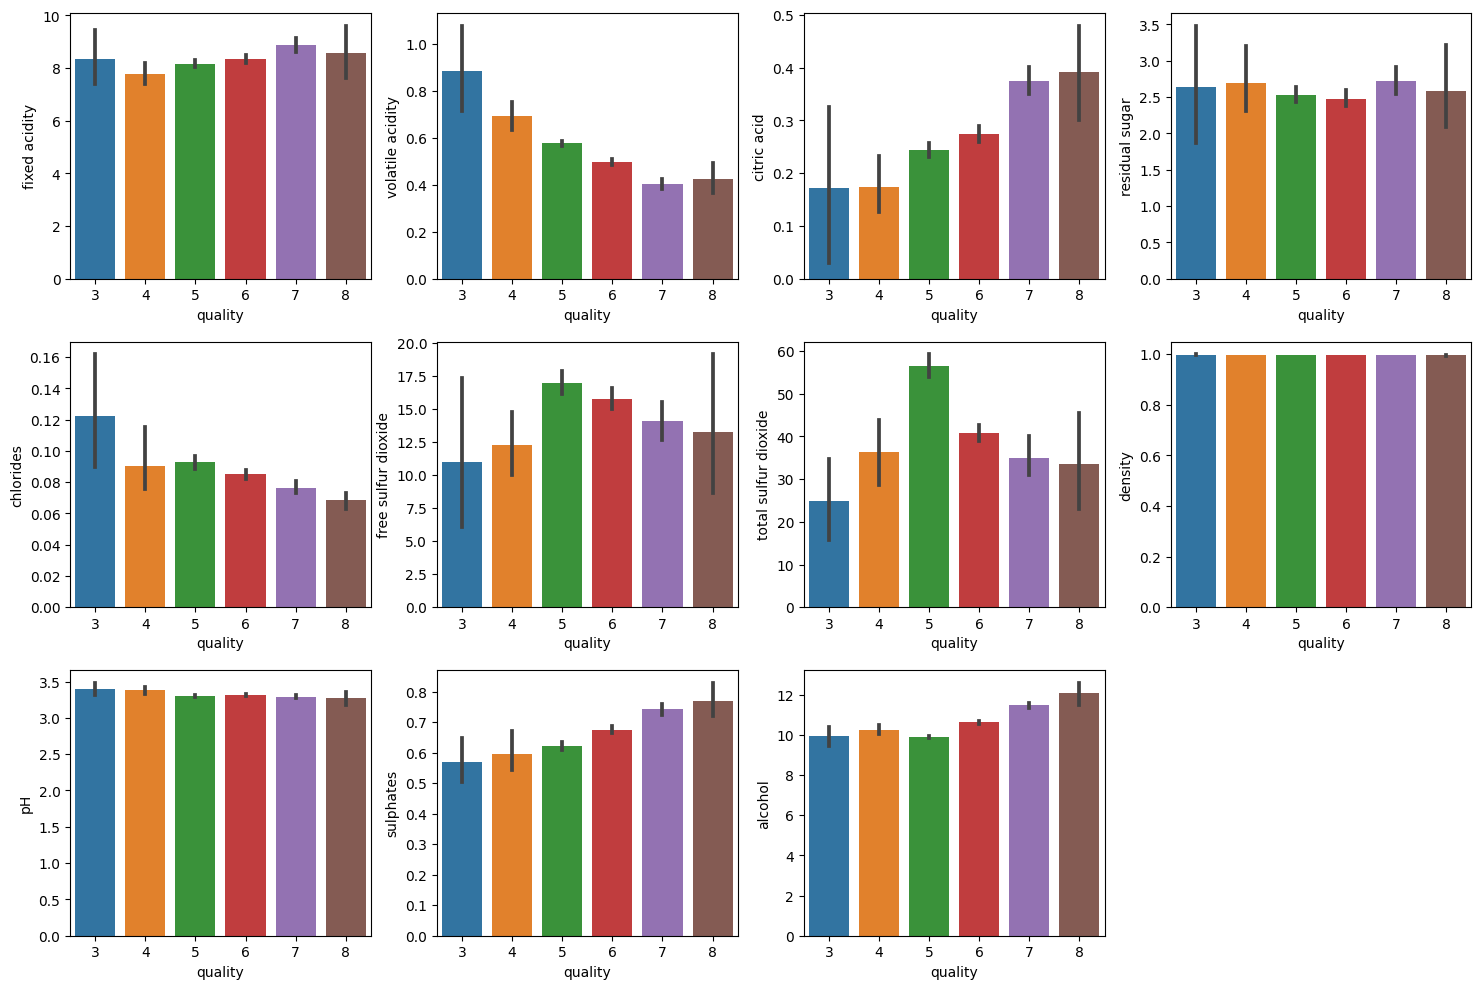

In [6]:
fig = plt.figure(figsize=(15, 10))

plt.subplot(3, 4, 1)
sns.barplot(x="quality", y="fixed acidity", data=wine)

plt.subplot(3, 4, 2)
sns.barplot(x="quality", y="volatile acidity", data=wine)

plt.subplot(3, 4, 3)
sns.barplot(x="quality", y="citric acid", data=wine)

plt.subplot(3, 4, 4)
sns.barplot(x="quality", y="residual sugar", data=wine)

plt.subplot(3, 4, 5)
sns.barplot(x="quality", y="chlorides", data=wine)

plt.subplot(3, 4, 6)
sns.barplot(x="quality", y="free sulfur dioxide", data=wine)

plt.subplot(3, 4, 7)
sns.barplot(x="quality", y="total sulfur dioxide", data=wine)

plt.subplot(3, 4, 8)
sns.barplot(x="quality", y="density", data=wine)

plt.subplot(3, 4, 9)
sns.barplot(x="quality", y="pH", data=wine)

plt.subplot(3, 4, 10)
sns.barplot(x="quality", y="sulphates", data=wine)

plt.subplot(3, 4, 11)
sns.barplot(x="quality", y="alcohol", data=wine)

plt.tight_layout()

In [7]:
wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [8]:
ranges = (2, 6.5, 8)
groups = ['bad', 'good']

wine['quality'] = pd.cut(wine['quality'], bins=ranges, labels=groups)
le = LabelEncoder()

wine['quality'] = le.fit_transform(wine['quality'])

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [9]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [10]:
good_quality = wine[wine['quality'] == 1]
bad_quality = wine[wine['quality'] == 0]
bad_quality = bad_quality.sample(frac=1)
bad_quality = bad_quality[:217]

new_df = pd.concat([good_quality, bad_quality])
new_df = new_df.sample(frac=1)

new_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1351,7.2,0.62,0.01,2.3,0.065,8.0,46.0,0.99332,3.32,0.51,11.8,0
782,9.0,0.82,0.05,2.4,0.081,26.0,96.0,0.99814,3.36,0.53,10.0,0
1031,7.3,0.55,0.01,1.8,0.093,9.0,15.0,0.99514,3.35,0.58,11.0,1
948,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,1
1132,7.4,0.36,0.34,1.8,0.075,18.0,38.0,0.99330,3.38,0.88,13.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,8.0,0.38,0.44,1.9,0.098,6.0,15.0,0.99560,3.30,0.64,11.4,0
491,9.2,0.41,0.50,2.5,0.055,12.0,25.0,0.99520,3.34,0.79,13.3,1
209,11.0,0.30,0.58,2.1,0.054,7.0,19.0,0.99800,3.31,0.88,10.5,1
1433,6.1,0.40,0.16,1.8,0.069,11.0,25.0,0.99550,3.42,0.74,10.1,1


In [11]:
new_df['quality'].value_counts()

0    217
1    217
Name: quality, dtype: int64

In [12]:
new_df. corr()[ 'quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.558042
sulphates               0.267930
citric acid             0.256641
fixed acidity           0.120483
residual sugar          0.041791
pH                     -0.042770
free sulfur dioxide    -0.084342
chlorides              -0.147885
total sulfur dioxide   -0.194089
density                -0.231783
volatile acidity       -0.391163
Name: quality, dtype: float64

In [13]:
from sklearn.model_selection import train_test_split

X = new_df.drop('quality', axis=1)
y = new_df['quality']

In [14]:
from sklearn.model_selection import train_test_split

X = new_df.drop('quality', axis=1)
y = new_df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
param = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1060]}
grid_rf = GridSearchCV(RandomForestClassifier(), param, scoring="accuracy", cv=10)
grid_rf.fit(X_train, y_train)

print('Best parameters -->', grid_rf.best_params_)

# Wine Quality Prediction

pred = grid_rf.predict(X_test)

print(confusion_matrix(y_test, pred))

print('\n')

print(classification_report(y_test, pred))

print('\n')

print(accuracy_score(y_test, pred))

Best parameters --> {'n_estimators': 200}
[[45 26]
 [11 49]]


              precision    recall  f1-score   support

           0       0.80      0.63      0.71        71
           1       0.65      0.82      0.73        60

    accuracy                           0.72       131
   macro avg       0.73      0.73      0.72       131
weighted avg       0.73      0.72      0.72       131



0.7175572519083969
